## tandon & weng

In [16]:
from pyVBRc.anisotropy.materials import AlignedInclusions, IsotropicMedium
import matplotlib.pyplot as plt 
import numpy as np

In [17]:
# epoxy matrix:
matrix = IsotropicMedium(0.35, 2.76 * 1e9, "youngs")
# glass fibres
inclusions = IsotropicMedium(0.2, 72.4 * 1e9, "youngs")

Text(0.5, 0, 'volume fraction')

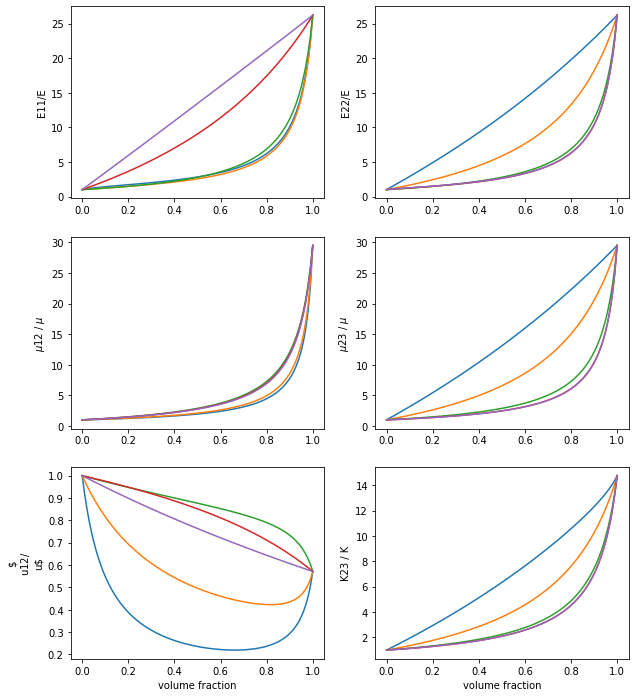

In [30]:
f, axs = plt.subplots(nrows = 3, ncols=2, figsize=(10,12))
for aspect_ratio in [0.01, 0.1, 1., 10., 100.]:
    ai = AlignedInclusions(aspect_ratio)
    vol_frac = np.linspace(0, 1, 100)
    ai.set_material(matrix, inclusions, vol_frac)
    E11, E22, mu12, mu23, nu12, K23 = ai._get_moduli()
    axs[0,0].plot(vol_frac, E11/matrix.youngs_modulus, label=aspect_ratio)
    axs[0,1].plot(vol_frac, E22/matrix.youngs_modulus, label=aspect_ratio)
    axs[1,0].plot(vol_frac, mu12/matrix.shear_modulus, label=aspect_ratio)
    axs[1,1].plot(vol_frac, mu23/matrix.shear_modulus, label=aspect_ratio)
    axs[2,0].plot(vol_frac, nu12/matrix.poisson_ratio, label=aspect_ratio)
    axs[2,1].plot(vol_frac, K23/matrix.plain_strain_bulk, label=aspect_ratio)

    
axs[0,0].set_ylabel('E11/E')    
axs[0,1].set_ylabel('E22/E')
axs[1,0].set_ylabel("$\mu$12 / $\mu$")
axs[1,1].set_ylabel("$\mu$23 / $\mu$")
axs[2,0].set_ylabel("$\nu$12 / $\nu$")
axs[2,1].set_ylabel("K23 / K")

axs[2,0].set_xlabel('volume fraction')
axs[2,1].set_xlabel('volume fraction')

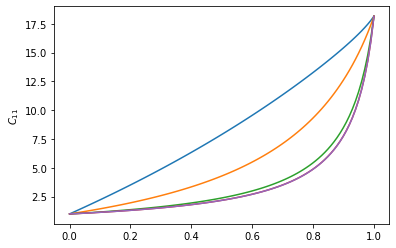

In [35]:
# f, axs = plt.subplots(nrows = 3, ncols=2, figsize=(10,12))
for aspect_ratio in [0.01, 0.1, 1., 10., 100.]:
    ai = AlignedInclusions(aspect_ratio)
    vol_frac = np.linspace(0, 1, 100)
    ai.set_material(matrix, inclusions, vol_frac)
    stiff = ai.get_stiffness_matrix()
    C = stiff.stiffness
    
    plt.plot(vol_frac, C[0,0,:]/C[0,0,0])
    plt.ylabel("$C_{11}$")

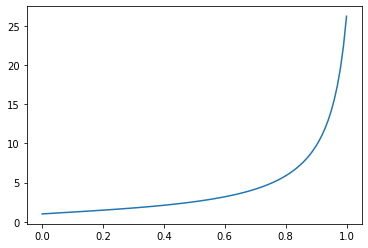